# Calore specifico e Calore latente acqua

## 1. Misura del calore specifico di alcuni materiali

#### 0. dati

In [6]:
dati = {
    'materiale_1': {
        'mis1' : {
            't1': 67.2,
            't_acq': 26.1,
            't_fin': 28.2,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 930.7
        },
        'mis2' : {
            't1': 64.4,
            't_acq': 28.4,
            't_fin': 30.8,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 930.3
        },
        'mis3' : {
            't1': 61.6,
            't_acq': 30.8,
            't_fin': 32.8,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 930.3
        },
        'mis4' : {
            't1': 60.0,
            't_acq': 32.4,
            't_fin': 34.0,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 929.4
        },
        'mis5' : {
            't1': 57.9,
            't_acq': 34.0,
            't_fin': 35.0,
            'm_c': 79.3,
            'm_th': 689.6,
            'm_tot': 929.2
        } 
    },


    'materiale_2': {
        'mis1' : {
            't1': 63.2,
            't_acq': 35,
            't_fin': 36,
            'm_c': 194.5,
            'm_th': 689.6,
            'm_tot': 946.2
        },
        'mis2' : {
            't1': 60.0,
            't_acq': 36.6,
            't_fin': 37.6,
            'm_c': 194.5,
            'm_th': 689.6,
            'm_tot': 945.7
        },
    },

    'materiale_3': {
        'mis1' : {
            't1': 67.6,
            't_acq': 19.8,
            't_fin': 20.8,
            'm_c': 55.5,
            'm_th': 689.6,
            'm_tot': 900
        },
        'mis2' : {
            't1': 64.0,
            't_acq': 21.8,
            't_fin': 22.2,
            'm_c': 55.5,
            'm_th': 689.6,
            'm_tot': 899.6
        },
    },

    'materiale_4': {
        'mis1' : {
            't1': 61.8,
            't_acq': 22.4,
            't_fin': 24.4,
            'm_c': 49.9,
            'm_th': 689.6,
            'm_tot': 899.2
        },
        'mis2' : {
            't1': 59.2,
            't_acq': 25,
            't_fin': 26.8,
            'm_c': 49.9,
            'm_th': 689.6,
            'm_tot': 898.5
        }
    }
}

#### 1. statistiche

In [51]:
import numpy as np

def calcola_calore_specifico(dict, key):
    # errori masse e temperature
    t_error = 0.2
    m_error = 0.1

    # massa equivalente 
    M_e = 25
    d_Me = 5

    cal_arr = []
    err_arr = []

    for nmis_key in dict[key]:
        # calcolo massa d'acqua
        m_acq = dict[key][nmis_key]['m_tot'] - dict[key][nmis_key]['m_th'] 

        # massa totale: acqua e massa equivalente
        m_acq_eq = m_acq + M_e
        d_m_acq_eq = 2 * m_error + d_Me

        # differenza temperature iniziali
        var_Ti = dict[key][nmis_key]['t_acq'] - dict[key][nmis_key]['t_fin']
        d_var_Ti = 2 * t_error

        # differenza temperature finali
        var_Tf = dict[key][nmis_key]['t_fin'] - dict[key][nmis_key]['t1']  
        d_var_Tf = 2 * t_error

        # massa corpo
        mc = dict[key][nmis_key]['m_c']

        # calore specifico
        cs = (m_acq_eq * var_Ti)/(mc * var_Tf)

        # errore calore specifico
        rel_m_acq = d_m_acq_eq/m_acq_eq
        rel_Ti = abs(d_var_Ti/var_Ti)
        rel_mc = abs(m_error/mc)
        tot_rel_err = rel_m_acq + 2*rel_Ti + rel_mc

        cs_error = cs * tot_rel_err
        
        cal_arr.append(cs)
        err_arr.append(cs_error)
        print(f'cs: {cs}/{cs_error}')

    return cal_arr, err_arr

In [52]:

# funzione per calcoloo valori statistici
def calcola_statistiche(valori, errori=None):
    # Calcolo della media
    media = np.mean(valori)

    # Calcolo della deviazione standard campionaria (ddof=1 per usare N-1)
    dev_std = np.std(valori, ddof=1)

    # Calcolo della deviazione standard della media
    dev_std_media = dev_std / np.sqrt(len(valori))

    # Mostrare i risultati di media, deviazione standard e deviazione standard della media
    print("Media: {:.6f}".format(media))
    print("Deviazione standard: {:.6f}".format(dev_std))
    print("Deviazione standard della media: {:.6f}".format(dev_std_media))

    # Se sono forniti gli errori, calcolare la media pesata e l'incertezza associata
    if errori is not None:
        # Calcolo dei pesi (1 / errori^2)
        pesi = 1 / np.square(errori)

        # Calcolo della media pesata
        media_pesata = np.sum(valori * pesi) / np.sum(pesi)

        # Calcolo dell'incertezza sulla media pesata
        incertezza_media_pesata = np.sqrt(1 / np.sum(pesi))

        # Mostrare i risultati della media pesata e della sua incertezza
        print("Media pesata: {:.6f}".format(media_pesata))
        print("Incertezza sulla media pesata: {:.6f}".format(incertezza_media_pesata))



cal_arr = calcola_calore_specifico(dati, 'materiale_1')

calcola_statistiche(cal_arr[0], cal_arr[1])

cs: 0.1806867785430205/0.07259180600650494
cs: 0.23932624752296894/0.08476105513709131
cs: 0.23267829620288588/0.09791846779680899
cs: 0.20549034823940263/0.10703961339869167
cs: 0.14570725287312017/0.11961302753298761
Media: 0.200778
Deviazione standard: 0.038608
Deviazione standard della media: 0.017266
Media pesata: 0.203220
Incertezza sulla media pesata: 0.041154


#### 2. grafico distribuzione misure per materiale 1

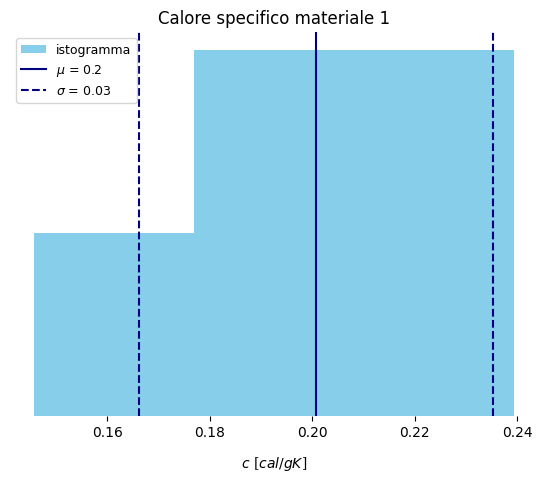

In [41]:
# distribuzione calori specifici
import matplotlib.pyplot as plt


media = np.mean(cal_arr[0]) 
std = np.std(cal_arr[0])

# grafico distribuzioni con media e mediana sovrapposta
fig, axs = plt.subplots(1, 1)


plt.subplots_adjust(left=0.075,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.3)

# img1: distribuzione misura accellerometro asse x
axs.hist(cal_arr[0], bins=3, label='istogramma', color='skyblue')
axs.axvline(media, c='navy', label=f'$\mu$ = {round(media,2)}')
axs.axvline(media + std, c='navy', linestyle='--', label=f'$\sigma$ = {round(std,2)}')
axs.axvline(media - std, c='navy', linestyle='--')
axs.legend(loc='upper left', fontsize=9)
axs.set_xlabel('$c$ [$cal/gK$]', labelpad=11, fontsize=10, fontname='Serif')
axs.set_title('Calore specifico materiale 1')



# fig.supylabel('Frequenza')

axs.set_yticks([])
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)

plt.show()

#### 3. grafico compatibilita misure

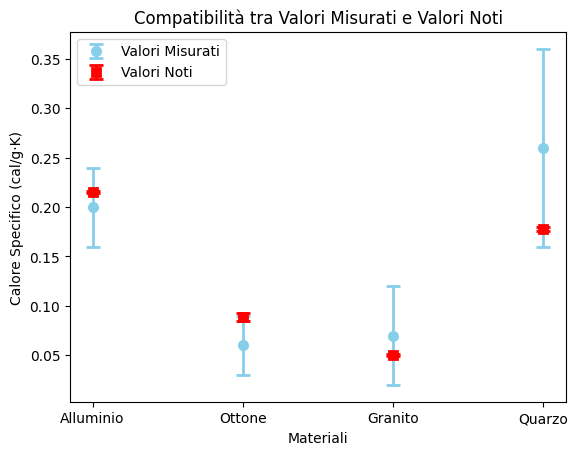

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def grafico_scatter_con_compatibilita(valori_misurati, errori_misurati, valori_noti, errori_noti, nomi_materiali):
    n = len(valori_misurati)  # Numero di materiali
    indici = np.arange(n)  # Indici per ogni materiale

    # Dimensione del grafico
    # plt.figure(figsize=(10, 6))

    # Aggiungere i valori misurati con barre di errore
    plt.errorbar(indici, valori_misurati, yerr=errori_misurati, fmt='o', 
                 label="Valori Misurati", capsize=5, elinewidth=2, markeredgewidth=2, color='skyblue')

    # Aggiungere i valori noti con barre di errore
    plt.errorbar(indici, valori_noti, yerr=errori_noti, fmt='s', 
                 label="Valori Noti", capsize=5, elinewidth=2, markeredgewidth=2, color='red')

    # Aggiungere titoli e etichette
    plt.title('Compatibilità tra Valori Misurati e Valori Noti')
    plt.xlabel('Materiali')
    plt.ylabel('Calore Specifico (cal/g·K)')
    plt.xticks(indici, nomi_materiali)

    # Aggiungere una legenda
    plt.legend()

    # Mostrare il grafico
    plt.show()

# Esempio di utilizzo
valori_misurati = [0.20, 0.06, 0.07, 0.26]
errori_misurati = [0.04, 0.03, 0.05, 0.1]

valori_noti = [0.215, 0.089, 0.05, 0.178]
errori_noti = [0.001, 0.004, 0.001, 0.002]
nomi_materiali = ['Alluminio', 'Ottone', 'Granito', 'Quarzo']

# Chiamata alla funzione per creare il grafico a dispersione
grafico_scatter_con_compatibilita(valori_misurati, errori_misurati, valori_noti, errori_noti, nomi_materiali)



## 2. Calore latente fusione ghiaccio